<a href="https://colab.research.google.com/github/ElenaBobro/hoom-work2-/blob/main/%22hw_6_3_%D0%9F%D0%B5%D1%80%D0%B5%D0%B2%D1%96%D1%80%D0%BA%D0%B0_%D0%B2%D0%B8%D0%B1%D1%96%D1%80%D0%BA%D0%B8_%D0%BD%D0%B0_%D0%BD%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D1%96%D1%81%D1%82%D1%8C_ipynb%22_LB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашнє завдання на тему "Перевірка вибірки на нормальність"

0.Зчитайте дані з `data.csv` та запишіть значення колонки data у форматі np.ndarray в змінну data. Ми будемо далі працювати з цією змінною.

In [4]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/file csv/data.csv')

data = df['data'].to_numpy()

Запустіть код нижче. Для коректної робити всіх подальших методів дані мають бути у вигляді одновимірного вектора, тобто мати розмір (100,).

In [5]:
data.shape

(100,)

## Перевірка вибірки на нормальність

1.**Візуалізація розподілу**

Подивимось спершу на розподіл наших даних. Для цього побудуємо розподіл даних (графік на вигляд як гістограма, тільки він нормований так, аби сума під кривою була рівна 1), а на нього накладемо лінійний графік щільності (PDF - для побудови використовуємо `scipy.stats.norm.pdf(...)`) теоретичного нормального розподілу з середнім та стандартним відхиленням як у наших даних.

Візуалізацію будуємо за аналогією прикладу, що наводився у лекції, коли ми будували кілька кривих щільності для одних і тих самих даних, тільки значно більш спрощено, бо розподіл для порівняння у нас лише один - нормальний.

Побудуйте графік як наведено в очікуваному результаті та напишіть ваш висновок, чи схоже, що дані розподілені нормально?

Підказка: весь графік будується за 6 рядків коду, три з яких - підписи осей і графіку. Аби побудувати лінійний графік функції щільності та він наклався на гістограму, необхідно задати значення іксів з діапазону значень наших даних. Ці значення вже задані для вас, залишилось дописати 5 рядочків коду :)

In [6]:
import matplotlib.pyplot as plt
import scipy.stats as stats

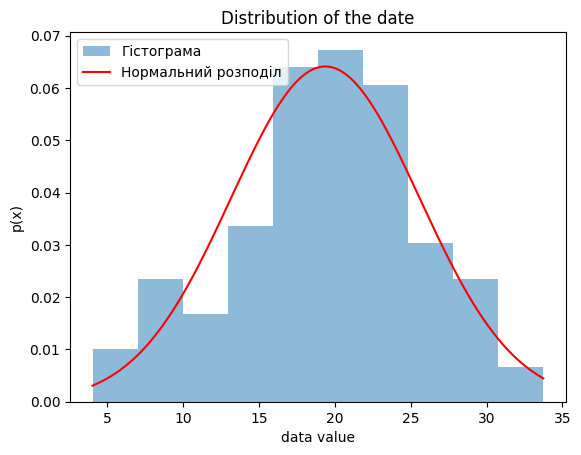

In [10]:
x_axis = np.arange(data.min(), data.max(), 0.01)
mean = np.mean(data)
std_dev = np.std(data)

plt.hist(data, bins=10, density=True, alpha=0.5, label='Гістограма')

plt.plot(x_axis, stats.norm.pdf(x_axis, mean, std_dev), 'r', label='Нормальний розподіл')
plt.title('Distribution of the date')
plt.xlabel('data value')
plt.ylabel('p(x)')
plt.legend()
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1SB_HOIgwfZXrtglBBlDfMYjg2eGGBSIX)


2.**QQ графік**

Ще одним візуалізаційним методом перевірки розподілу вибірки даних на нормальність є графік квантиль-квантиль, Q-Q графік або QQ графік. У лекції ми розбирали, що це за графік, та як його інтерпретувати.

Побудуйте QQ-Plot для порівняння з нормальним розподілом наших даних та напишіть висновок з графіку, чи можна сказати, що дані розподілені за нормальним законом?

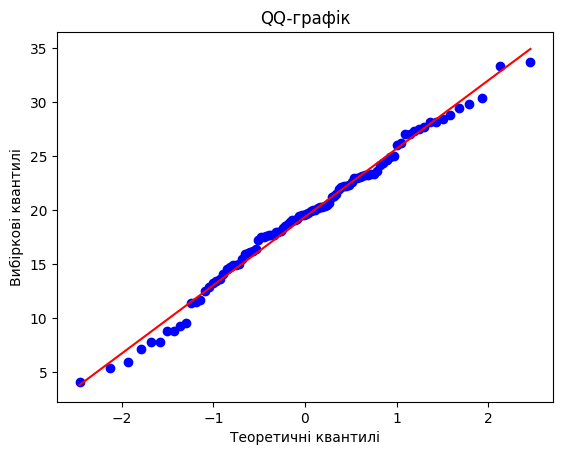

In [9]:
stats.probplot(data, dist="norm", plot=plt)
plt.title('QQ-графік')
plt.xlabel('Теоретичні квантилі')
plt.ylabel('Вибіркові квантилі')
plt.show()

 Враховуючи те, що більшість точок відповідає червоній лінії, можна зробити висновок, що дані розподілені за нормальним законом. Але є незначні відхилення на краях.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1-eDd16OVgqEjzFUBjJJzSMcwSrzNNm_V)

3.**Тест Шапіро-Вілка**

Тест Шапіро-Вілка визначає для вибірки, наскільки ймовірно, що вона була витягнута з нормального розподілу.
Нульова гіпотеза H0 тесту Шапіро-Вилка полягає в тому, що випадкова величина, вибірка якої відома, розподілена за нормальним законом. Альтернативна гіпотеза H1 полягає в тому, що закон розподілу **не** є нормальним.

**Задача**: протестувати нашу вибірку на нормальність з допомогою теcта Шапіро-Вілка, реалізованого в функцію [scipy.stats.shapiro](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html). Висновок зробіть на основі аналізу p-значення. На рівні значущості = 0.05 чи можемо ми відхилити гіпотезу Н0? Відповідь можна надати текстом, або написати простий if-else блок для виведення висновку спираючись на отримане p-значення. Нагадування:
- p <= alpha: відхиляємо H0.
- p > alpha: не можемо відхилити H0.

Також пропоную вам переглянути оце [відео](https://youtu.be/eh9eYLBecWk), тут розказується про QQ графік, тест Шапіро, та звʼязок між ними.


In [10]:
alpha = 0.05
stat, p_value = stats.shapiro(data)

if p_value <= alpha:
    print(f'Відхиляємо H0 (p = {p_value}) — дані не є нормальними.')
else:
    print(f'Не можемо відхилити H0 (p = {p_value}) — дані є нормальними.')

Не можемо відхилити H0 (p = 0.5677973106978921) — дані є нормальними.
